# Customer Behavior Analysis and Visualizations

Contents

#1 Import Libraries and Data 

#2 Regional Segementation 

#3 Exclude low-activity customers

#4 Customer profiles 

#5 Visualizing profile distributions

#6 Descriptive statistics on customer profiles

#7 Visualizing regional profile differences 

#8 Visualizing profile differences in department preferences 

#9 Price_range Visualization and Investigative Crosstabs


#01 Import Libraries and Data

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#Folder Path
path = r'C:\Users\Caroline\Documents\Career Foundry\03 2023 Instacart Basket Analysis'
viz_path = r'C:\Users\Caroline\Documents\Career Foundry\03 2023 Instacart Basket Analysis\04 Analysis\Visualizations'

In [4]:
#import instacart_data_all.pkl as df
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_data_all.pkl'))

In [5]:
#check data after importing
df.shape

(32404859, 30)

In [6]:
#check for null values
df.isnull().sum()

order_id                           0
user_id                            0
order_number                       0
orders_day_of_week                 0
order_hour_of_day                  0
days_since_prior_order       2076096
product_id                         0
add_to_cart_order                  0
reordered                          0
product_name                       0
department_id                      0
prices                             0
aisle_id                           0
price_range_loc                    0
busiest_day                        0
busiest_period                     0
busiest_period_of_the_day          0
max_order                          0
loyalty_flag                       0
mean_spending                      0
spending_flag                      0
order_freq_flag                    5
median_order_freq                  5
gender                             0
state                              0
age                                0
date_joined                        0
n

In [7]:
#Creating a data frame with null values
df_nan = df[df['order_freq_flag'].isnull() == True]

In [8]:
# Examine an abbreviated df_nan 
df_nan[['user_id', 'order_number','order_freq_flag', 'median_order_freq']]

,user_id,order_number,order_freq_flag,median_order_freq
32377906,159838,1,NaN,NaN
32377907,159838,1,NaN,NaN
32377908,159838,1,NaN,NaN
32377909,159838,1,NaN,NaN
32377910,159838,1,NaN,NaN


In [9]:
#Checking the number of orders for this user_id
df_prob = df[df['user_id'] == '159838']
df_prob

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,order_freq_flag,median_order_freq,gender,state,age,date_joined,number_dependants,family_status,income
32377906,895835,159838,1,0,17,NaN,10749,3,0,Organic Red Bell Pepper,...,Low spender,NaN,NaN,Male,Arkansas,63,11/9/2018,3,married,140994
32377907,895835,159838,1,0,17,NaN,33401,6,0,Goat Cheese Crumbles,...,Low spender,NaN,NaN,Male,Arkansas,63,11/9/2018,3,married,140994
32377908,895835,159838,1,0,17,NaN,23695,2,0,California Veggie Burger,...,Low spender,NaN,NaN,Male,Arkansas,63,11/9/2018,3,married,140994
32377909,895835,159838,1,0,17,NaN,21334,5,0,Organic Peeled Garlic,...,Low spender,NaN,NaN,Male,Arkansas,63,11/9/2018,3,married,140994
32377910,895835,159838,1,0,17,NaN,22198,1,0,4X Ultra Concentrated Natural Laundry Detergen...,...,Low spender,NaN,NaN,Male,Arkansas,63,11/9/2018,3,married,140994


In [10]:
# Since the user has only 1 order, the median value should be 1, and the order_freq_flag is 'Non-frequent customer'
df.fillna({'order_freq_flag':'Non-frequent customer', 'median_order_freq': 1}, inplace=True)

In [11]:
#check for null values
df.isnull().sum()

order_id                           0
user_id                            0
order_number                       0
orders_day_of_week                 0
order_hour_of_day                  0
days_since_prior_order       2076096
product_id                         0
add_to_cart_order                  0
reordered                          0
product_name                       0
department_id                      0
prices                             0
aisle_id                           0
price_range_loc                    0
busiest_day                        0
busiest_period                     0
busiest_period_of_the_day          0
max_order                          0
loyalty_flag                       0
mean_spending                      0
spending_flag                      0
order_freq_flag                    0
median_order_freq                  0
gender                             0
state                              0
age                                0
date_joined                        0
n

# Security and PII note

-Security implications - columns 'first_name' and 'Surname' were removed in previous scripts as they did not contribute relevant information. There are no other PII concerns.

In [12]:
#Add departments column to dataframe
#import departments_wrangled.csv as df_dep
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [13]:
#check df_dep 
df_dep.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [14]:
# Rename unnamed column to 'department_id'
df_dep.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [15]:
# Create a data dictionary for departments
dept_dict = dict(zip(df_dep["department_id"], df_dep["department"]))

In [16]:
dept_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [17]:
# Create a column to add the department name to df
df['department'] = df['department_id'].map(dept_dict)

In [18]:
#check the df shape
df.shape

(32404859, 31)

#02 Regional Segementation

In [19]:
# Divide States into regions according to 'List of regions of the United States' wikipedia entry
northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [20]:
# Use the loc function to determine the region for each row in df. 
df.loc[df['state'].isin(northeast), 'region'] = 'Northeast'
df.loc[df['state'].isin(midwest), 'region'] = 'Midwest'
df.loc[df['state'].isin(south), 'region'] = 'South'
df.loc[df['state'].isin(west), 'region'] = 'West'

In [21]:
# Check the 'region' column for results
df['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [22]:
#Comparison of spending between regions
# create a crosstab between region and spending_flag columns
crosstab_region_spending = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

In [23]:
crosstab_region_spending

spending_flag,High spender,Low spender
region,,
Midwest,29265,7568060
Northeast,18642,5704094
South,40579,10751306
West,31223,8261690


- Takaways from regional spending analysis
- The proportion of items bought by high spenders in different regions varies by 0.06% at most.
- High spenders in the Midwest proportionally bought the most; high spenders in the Northeast the least

#03 Exclude low-activity customers from data

In [24]:
# Create an exclusion flag for low-activity customers with <5 total orders.
# The 'max_order' column contains the max total orders for that user
df_reg_cust = df[df['max_order'] >= 5]

In [20]:
df_reg_cust.shape

(30964564, 32)

#04 Customer profiles

In [25]:
#Age profile
#Check the descriptive statistics for age variable
df_reg_cust['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

<AxesSubplot:ylabel='Frequency'>

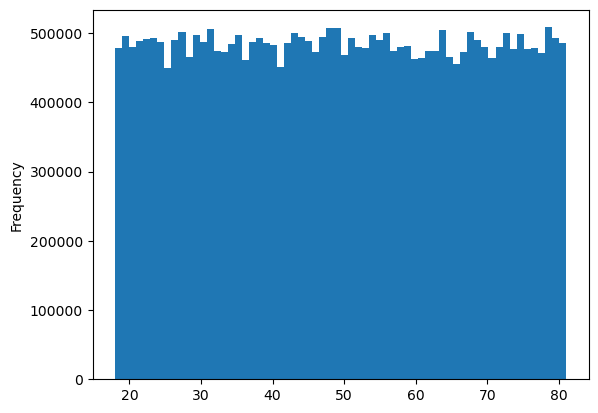

In [26]:
#Create a histogram of customer age
df_reg_cust['age'].plot.hist(bins = 64)

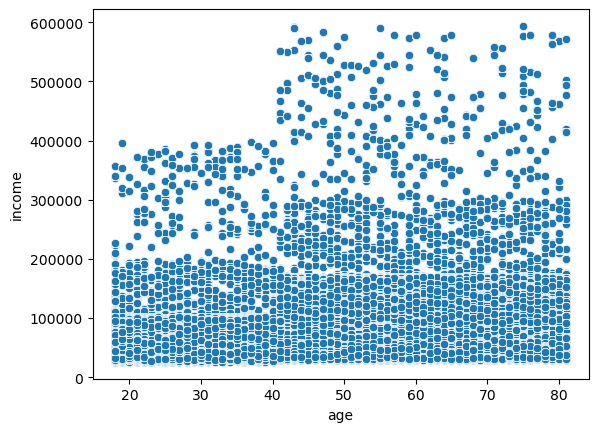

In [41]:
#recreating a scatterplot from Task 4.9 to show income range by age 
splot = sns.scatterplot(x = 'age', y = 'income',data = df_reg_cust)

-The histogram shows age distribution across the customer base is fairly uniform and varies from roughly 450,000 to 500,000 customers at ages between 18 and 81. This scatterplot shows an increase in income range around age 40 and 65 will be used since it is a normal retirement age.

Customers will be classified as follows
    -Young Adult: < 40
    -Middle-Aged: 40-65
    -Senior: >= 65

In [27]:
# Create age_group classification - using df to add new columns, will subset to new df_users after all columns have been created
df_reg_cust.loc[(df_reg_cust['age'] < 40), 'age_group'] = 'Young Adult'
df_reg_cust.loc[(df_reg_cust['age'] >= 40) & (df['age'] < 65), 'age_group'] = 'Middle-Aged'
df_reg_cust.loc[df_reg_cust['age'] >= 65, 'age_group'] = 'Senior'

C:\Users\Caroline\AppData\Local\Temp\ipykernel_10232\1845468522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg_cust.loc[(df_reg_cust['age'] < 40), 'age_group'] = 'Young Adult'


In [28]:
df_reg_cust.shape

(30964564, 33)

In [29]:
#Checking entries of age_group column - by amount of products ordered
df_reg_cust['age_group'].value_counts(dropna = False).sort_index()

Middle-Aged    12103910
Senior          8195544
Young Adult    10665110
Name: age_group, dtype: int64

In [30]:
#Income profile
#Check the descriptive statistics for income variable
df_reg_cust['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

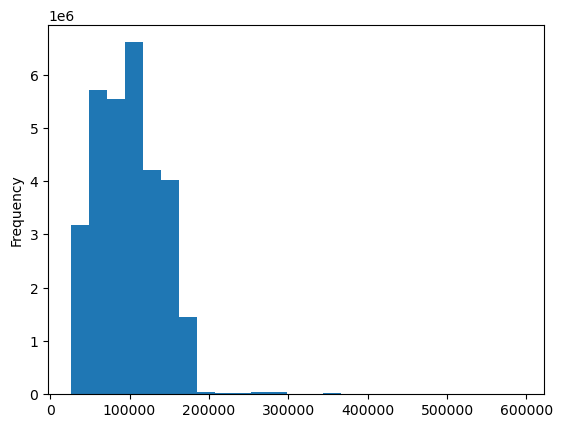

In [31]:
#Create a histogram of customer income
hist_cust_income = df_reg_cust['income'].plot.hist(bins = 25)

-Income distribution across the customer base ranges from 25k USD to 593K USD with an average income of 99k USD. The majority of the customer base falls within the 25k to 175k USD range. While a group of very high income customers could be classified, the sample size would be small in comparison to the other groups.

-Customers will be classified as follows 
    -025-75k: >75k 
    -75-125k: 75k - 125k 
    -125k+: 125k - 593k


In [32]:
# Create income_group classification
df_reg_cust.loc[(df_reg_cust['income'] < 75000), 'income_group'] = '025-75k'
df_reg_cust.loc[(df_reg_cust['income'] >= 75000) & (df_reg_cust['income'] < 125000), 'income_group'] = '075-125k'
df_reg_cust.loc[(df_reg_cust['income'] >= 125000), 'income_group'] = '125k+'

C:\Users\Caroline\AppData\Local\Temp\ipykernel_10232\2657633794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg_cust.loc[(df_reg_cust['income'] < 75000), 'income_group'] = '025-75k'


In [34]:
# Check the 'income_group' counts by number of items ordered
df_reg_cust['income_group'].value_counts(dropna = False)

075-125k    12779840
025-75k      9906680
125k+        8278044
Name: income_group, dtype: int64

In [35]:
df_reg_cust.shape

(30964564, 34)

In [36]:
# Family/dependants profile
df_reg_cust['number_dependants'].describe()

count    3.096456e+07
mean     1.501819e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: number_dependants, dtype: float64

<AxesSubplot:ylabel='Frequency'>

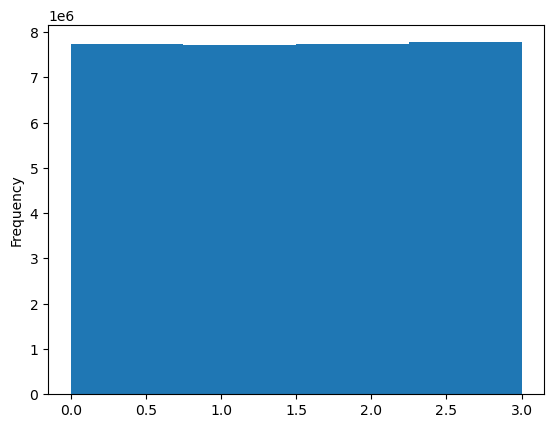

In [37]:
#Create a histogram of customer dependants
df_reg_cust['number_dependants'].plot.hist(bins = 4)

In [38]:
#Create a crosstab between number_dependants and family_status
family_crosstab = pd.crosstab(df_reg_cust['family_status'], df_reg_cust['number_dependants'], dropna = False)

In [39]:
family_crosstab

number_dependants,0,1,2,3
family_status,,,,
divorced/widowed,2645271,0,0,0
living with parents and siblings,0,508045,484658,488469
married,0,7211061,7248603,7284047
single,5094410,0,0,0


-The family_crosstab shows no single adults or divorced/widowed adults with dependants, 'family_status' will be classified based on number of dependants.

-Customers will be classified as follows 
    -No dependants: 0 dependants
    -Has dependants: 1+ dependants

In [40]:
# Create family_status classification
df_reg_cust.loc[(df_reg_cust['number_dependants'] == 0), 'dependants'] = 'No dependants'
df_reg_cust.loc[(df_reg_cust['number_dependants'] >= 1), 'dependants'] = 'Has dependants'

C:\Users\Caroline\AppData\Local\Temp\ipykernel_10232\2552553706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg_cust.loc[(df_reg_cust['number_dependants'] == 0), 'dependants'] = 'No dependants'


In [41]:
# Check the 'dependants' counts by the number of items ordered
df_reg_cust['dependants'].value_counts(dropna = False)

Has dependants    23224883
No dependants      7739681
Name: dependants, dtype: int64

In [42]:
df_reg_cust.shape

(30964564, 35)

In [43]:
# Diet choice
diet_crosstab = pd.crosstab(df_reg_cust['department_id'], df_reg_cust['user_id'], dropna = False)

In [44]:
# Assigning diet flags to users and storing it in a dictionary
diet_dict = dict()
for user in diet_crosstab:
    workinglist = diet_crosstab[user].tolist()
    if workinglist[11] == 0 and workinglist[15] == 0:
        diet_dict[user] = 'Vegan'
    elif workinglist[11] == 0:
        diet_dict[user] = 'Vegetarian'
    else:
        diet_dict[user] = 'Meat-consumer'

In [45]:
# assigning user flags to the list
diet_list = []
for user in df_reg_cust['user_id']:
    diet_list.append(diet_dict[user])

In [46]:
#Adding 'diet_style' column to df_reg_cust
df_reg_cust['diet_style'] = diet_list

C:\Users\Caroline\AppData\Local\Temp\ipykernel_10232\664255702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg_cust['diet_style'] = diet_list


In [47]:
df_reg_cust.shape

(30964564, 36)

In [48]:
df_reg_cust['diet_style'].value_counts(dropna = False)

Meat-consumer    23065332
Vegetarian        7589236
Vegan              309996
Name: diet_style, dtype: int64

In [49]:
# Pet ownership profile
# Assigning pet flags to users and storing it in a dictionary
pet_dict = dict()
for user in diet_crosstab:
    workinglist = diet_crosstab[user].tolist()
    if workinglist[7] == 0 :
        pet_dict[user] = 'No pet'
    else:
        pet_dict[user] = 'Has pet'

In [50]:
# assigning user flags to the list
pet_list = []
for user in df_reg_cust['user_id']:
    pet_list.append(pet_dict[user])

In [51]:
#Adding 'pets' column to df_reg_cust
df_reg_cust['has_pet'] = pet_list

C:\Users\Caroline\AppData\Local\Temp\ipykernel_10232\100708516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg_cust['has_pet'] = pet_list


In [52]:
df_reg_cust.shape

(30964564, 37)

In [53]:
df_reg_cust['has_pet'].value_counts(dropna = False)

No pet     27513213
Has pet     3451351
Name: has_pet, dtype: int64

In [159]:
#Export df_reg_cust in .pkl format
df_reg_cust.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_data_all_reg_customers.pkl'))

#5 Visualizing profile distributions 

In [54]:
# create abbreviated profile dataframe
df_profile = df_reg_cust[['user_id', 
                          'age',
                          'age_group', 
                          'income_group', 
                          'dependants', 
                          'department', 
                          'diet_style', 
                          'has_pet', 
                          'region', 
                          'loyalty_flag', 
                          'spending_flag', 
                          'mean_spending', 
                          'order_freq_flag', 
                          'reordered' ,
                          'family_status']]

In [55]:
# create dataframe with only one instance of each user_id
df_customer = df_profile.drop_duplicates(subset = ["user_id"])

In [56]:
df_customer.shape

(162631, 15)

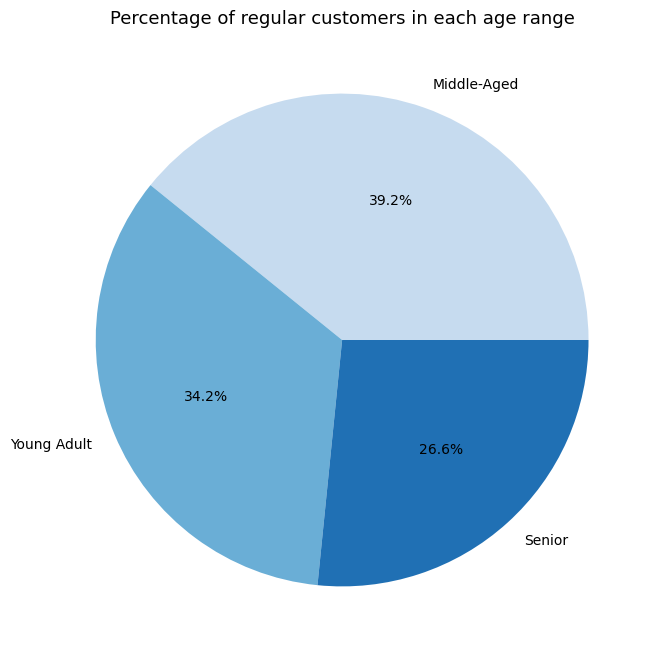

In [57]:
# Age Flag Visualization
pie_user_age = df_customer['age_group'].value_counts().plot.pie(figsize = (8,8), 
                                                                colors = sns.color_palette('Blues', 3), 
                                                                autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of regular customers in each age range',fontsize=13)
plt.show()

In [58]:
pie_user_age.figure.savefig(os.path.join(viz_path, 'pie_user_age'))

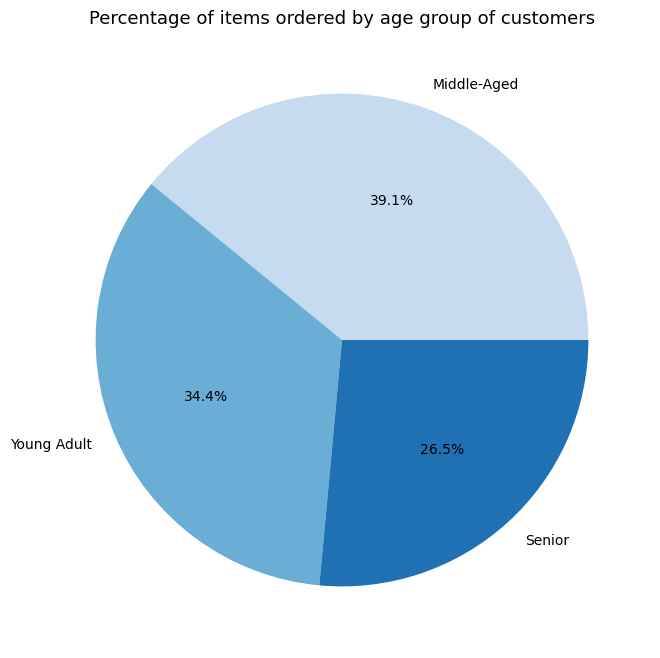

In [59]:
#Pie chart of percentage of items ordered by age group
pie_orders_age = df_reg_cust['age_group'].value_counts().plot.pie(figsize = (8,8), 
                                                                         colors = sns.color_palette('Blues', 3), 
                                                                         autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of items ordered by age group of customers',fontsize=13)
plt.show()

In [60]:
pie_orders_age.figure.savefig(os.path.join(viz_path, 'pie_orders_age'))

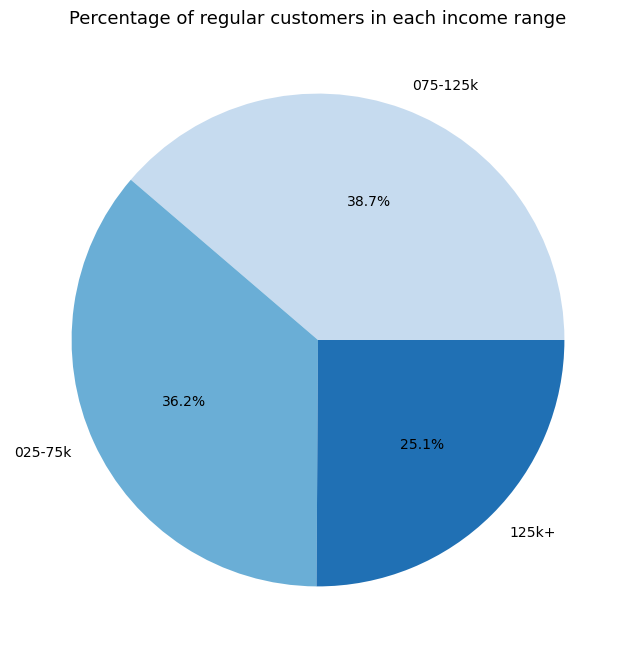

In [61]:
#Pie chart of customer income ranges
pie_user_income = df_customer['income_group'].value_counts().plot.pie(figsize = (8,8), 
                                                                      colors = sns.color_palette('Blues', 3), 
                                                                      autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of regular customers in each income range',fontsize=13)
plt.show()

In [62]:
pie_user_income.figure.savefig(os.path.join(viz_path, 'pie_user_income'))

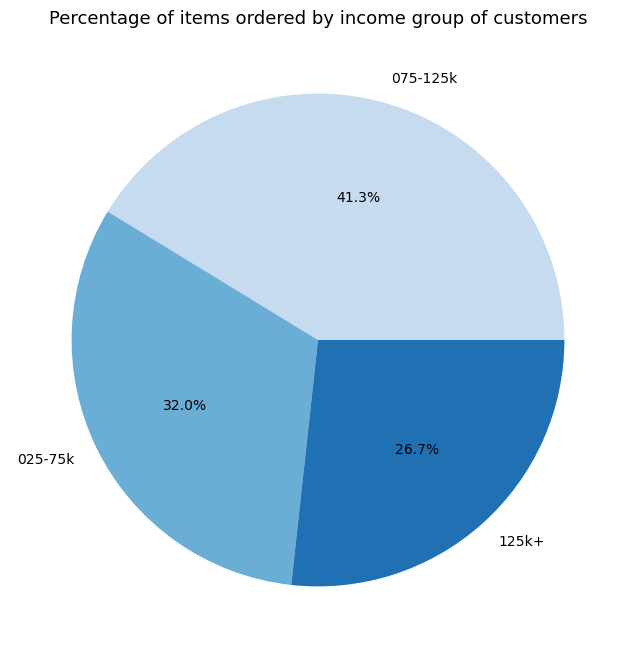

In [63]:
#Pie chart of percentage of items ordered by income group
pie_orders_income = df_reg_cust['income_group'].value_counts().plot.pie(figsize = (8,8), 
                                                                         colors = sns.color_palette('Blues', 3), 
                                                                         autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of items ordered by income group of customers',fontsize=13)
plt.show()

In [64]:
pie_orders_income.figure.savefig(os.path.join(viz_path, 'pie_orders_income'))

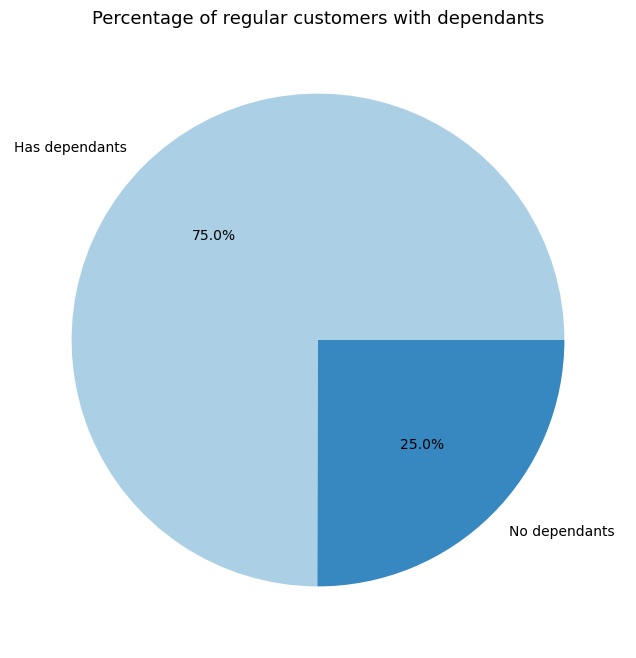

In [65]:
#Pie chart of customer with dependants
pie_user_dependants = df_customer['dependants'].value_counts().plot.pie(figsize = (8,8), 
                                                                        colors = sns.color_palette('Blues', 2), 
                                                                        autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of regular customers with dependants',fontsize=13)
plt.show()

In [66]:
pie_user_dependants.figure.savefig(os.path.join(viz_path, 'pie_user_dependants'))

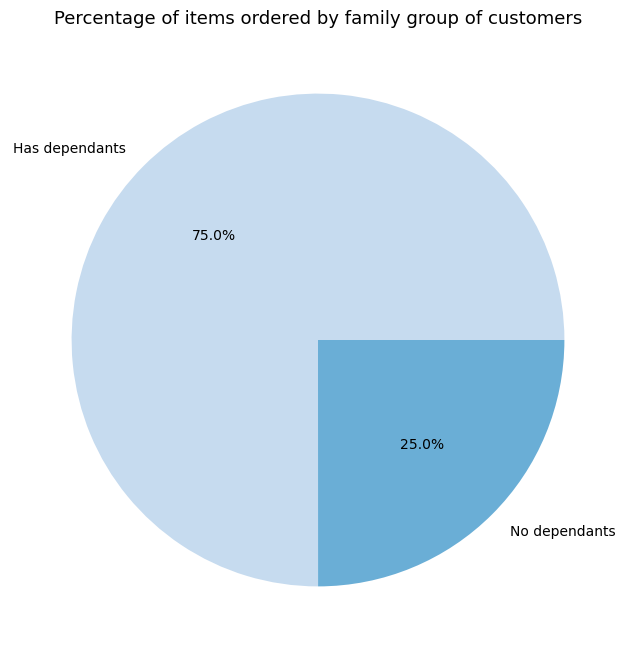

In [67]:
#Pie chart of percentage of items ordered by family group
pie_orders_family = df_reg_cust['dependants'].value_counts().plot.pie(figsize = (8,8), 
                                                                         colors = sns.color_palette('Blues', 3), 
                                                                         autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of items ordered by family group of customers',fontsize=13)
plt.show()

In [68]:
pie_orders_family.figure.savefig(os.path.join(viz_path, 'pie_orders_family'))

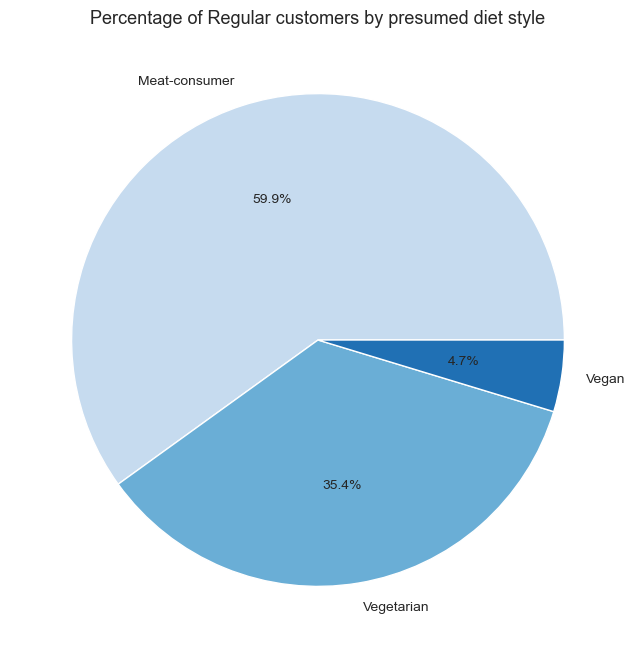

In [177]:
#Pie chart of customer's diet style based on previous buying history
pie_user_diet = df_customer['diet_style'].value_counts().plot.pie(figsize = (8,8), 
                                                                  colors = sns.color_palette('Blues', 3), 
                                                                  autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of Regular customers by presumed diet style',fontsize=13)
plt.show()

In [178]:
pie_user_diet.figure.savefig(os.path.join(viz_path, 'pie_user_diet'))

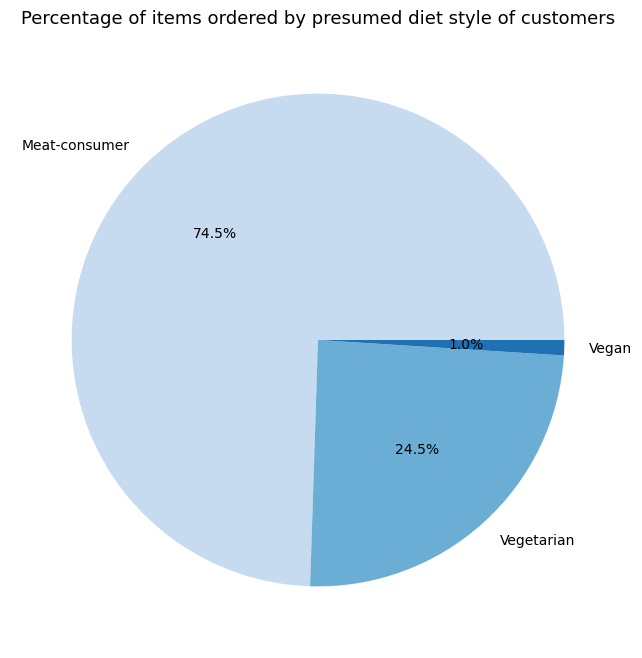

In [71]:
#Pie chart of percentage of items ordered by diet style
pie_orders_diet = df_reg_cust['diet_style'].value_counts().plot.pie(figsize = (8,8), 
                                                                         colors = sns.color_palette('Blues', 3), 
                                                                         autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of items ordered by presumed diet style of customers',fontsize=13)
plt.show()

In [72]:
pie_orders_diet.figure.savefig(os.path.join(viz_path, 'pie_orders_diet'))

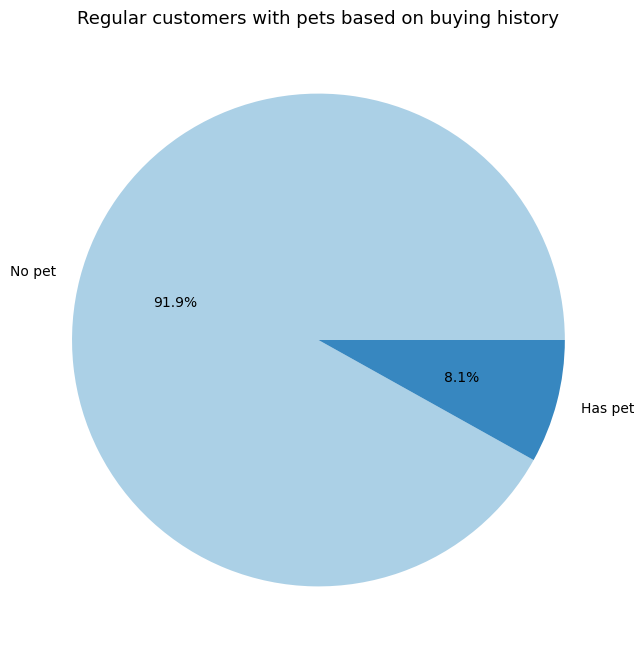

In [73]:
#Pie chart of customer's pet ownership based on previous buying history
pie_user_pet = df_customer['has_pet'].value_counts().plot.pie(figsize = (8,8), 
                                                              colors = sns.color_palette('Blues', 2), 
                                                              autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Regular customers with pets based on buying history',fontsize=13)
plt.show()

In [74]:
pie_user_pet.figure.savefig(os.path.join(viz_path, 'pie_user_pet'))

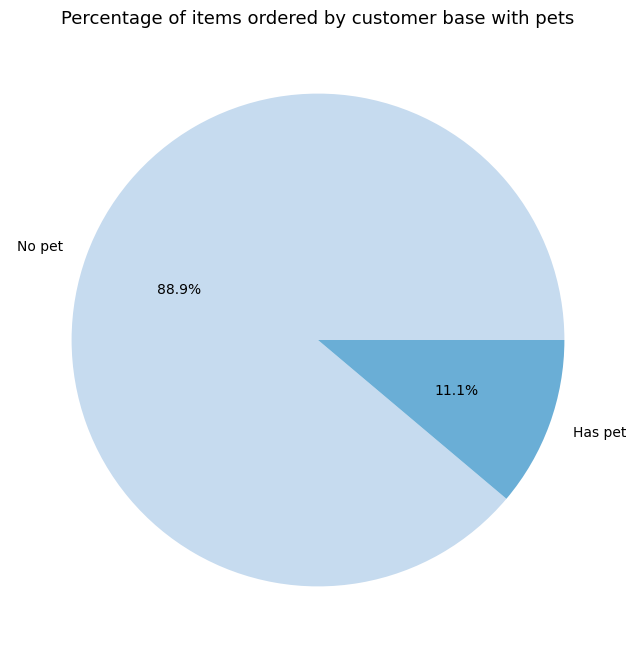

In [75]:
#Pie chart of percentage of items by pet ownership 
pie_orders_pet = df_reg_cust['has_pet'].value_counts().plot.pie(figsize = (8,8), 
                                                                         colors = sns.color_palette('Blues', 3), 
                                                                         autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of items ordered by customer base with pets',fontsize=13)
plt.show()

In [76]:
pie_orders_pet.figure.savefig(os.path.join(viz_path, 'pie_orders_pet'))

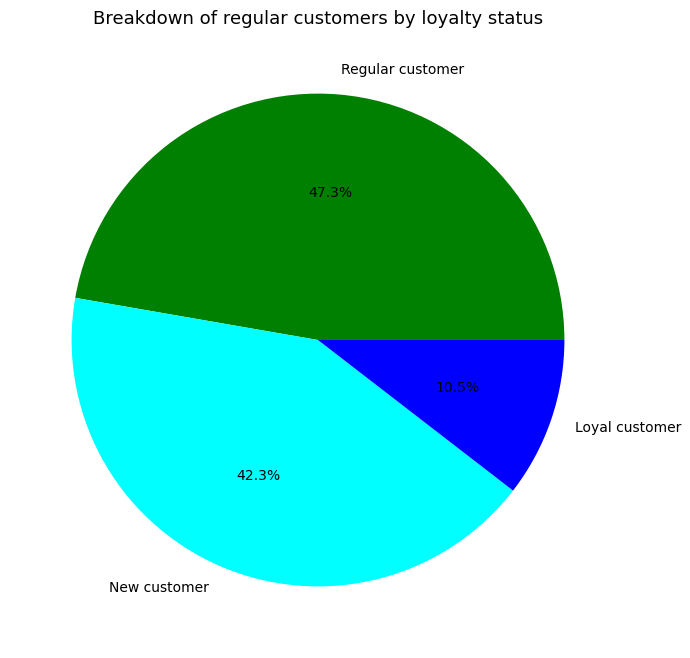

In [77]:
#Pie chart of customers by loyalty flag
pie_user_loyal = df_customer['loyalty_flag'].value_counts().plot.pie(figsize = (8,8), 
                                                              colors = ('Green', 'Cyan', 'Blue'), 
                                                              autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Breakdown of regular customers by loyalty status',fontsize=13)
plt.show()

In [78]:
pie_user_loyal.figure.savefig(os.path.join(viz_path, 'pie_user_loyal'))

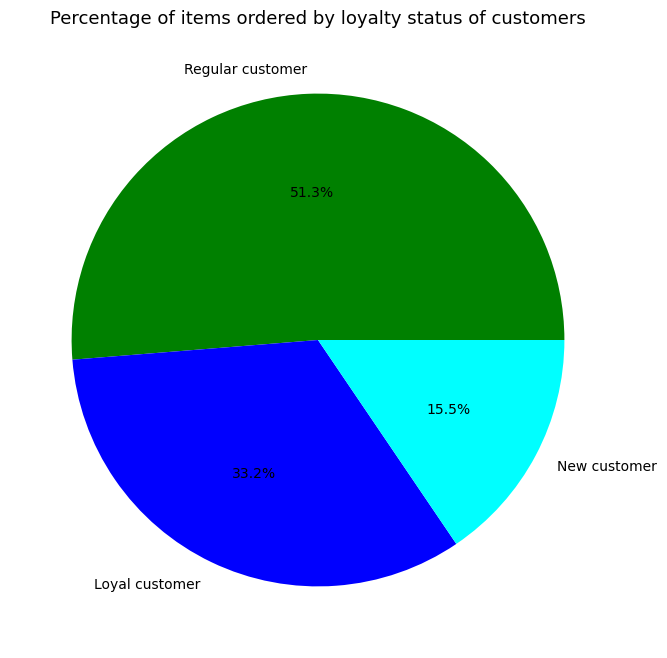

In [79]:
#Pie chart of percentage of items ordered by loyalty_flag 
pie_orders_loyal = df_reg_cust['loyalty_flag'].value_counts().plot.pie(figsize = (8,8), 
                                                                         colors = ('Green', 'Blue', 'Cyan'), 
                                                                         autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of items ordered by loyalty status of customers',fontsize=13)
plt.show()

In [80]:
pie_orders_loyal.figure.savefig(os.path.join(viz_path, 'pie_orders_loyal'))

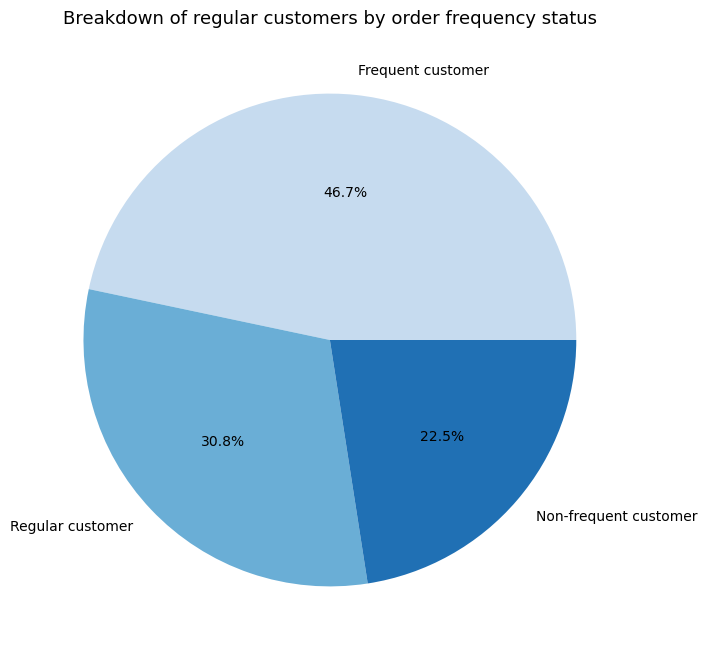

In [81]:
#Pie chart of customers by order frequency
pie_user_freq = df_customer['order_freq_flag'].value_counts().plot.pie(figsize = (8,8), 
                                                              colors = sns.color_palette('Blues', 3), 
                                                              autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Breakdown of regular customers by order frequency status',fontsize=13)
plt.show()

In [82]:
pie_user_freq.figure.savefig(os.path.join(viz_path, 'pie_user_freq'))

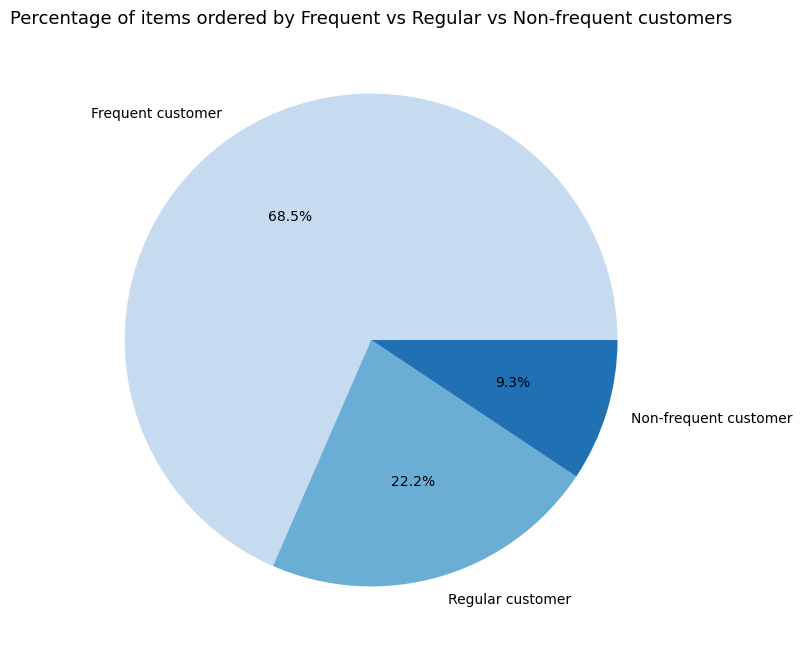

In [83]:
#Pie chart of percentage of items ordered by order_frequency_flag 
pie_orders_freq = df_reg_cust['order_freq_flag'].value_counts().plot.pie(figsize = (8,8), 
                                                                         colors = sns.color_palette('Blues', 3), 
                                                                         autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of items ordered by Frequent vs Regular vs Non-frequent customers',fontsize=13)
plt.show()

In [84]:
pie_orders_freq.figure.savefig(os.path.join(viz_path, 'pie_orders_freq'))

#6 Descriptive statistics on customer profiles

In [85]:
# Usage freq. and expenditure by Age groups
cross_age_orderhabits = df_reg_cust.groupby('age_group').agg({'prices': ['mean', 'min', 'max'], 
                                                              'days_since_prior_order': ['mean', 'min', 'max']})

In [86]:
# Usage freq. and expenditure by Income groups
cross_income_orderhabits = df_reg_cust.groupby('income_group').agg({'prices': ['mean', 'min', 'max'], 
                                                                    'days_since_prior_order': ['mean', 'min', 'max']})

In [87]:
# Usage freq. and expenditure by customers with dependants and without
cross_family_orderhabits = df_reg_cust.groupby('dependants').agg({'prices': ['mean', 'min', 'max'], 
                                                                  'days_since_prior_order': ['mean', 'min', 'max']})

In [88]:
# Usage freq. and expenditure by customers grouped by diet
cross_diet_orderhabits = df_reg_cust.groupby('diet_style').agg({'prices': ['mean', 'min', 'max'], 
                                                                'days_since_prior_order': ['mean', 'min', 'max']})

In [89]:
# Usage freq. and expenditure by customers grouped by pet ownership
cross_pet_orderhabits = df_reg_cust.groupby('has_pet').agg({'prices': ['mean', 'min', 'max'], 
                                                            'days_since_prior_order': ['mean', 'min', 'max']})

#7 Visualizing regional profile differences 

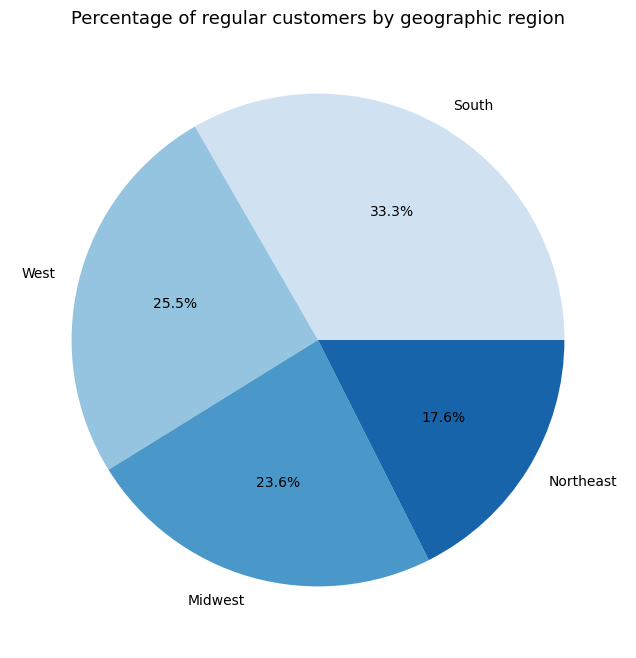

In [90]:
#Pie chart of percentage of regular customers in each region
pie_user_region = df_customer['region'].value_counts().plot.pie(figsize = (8,8), colors = sns.color_palette('Blues', 4), autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of regular customers by geographic region',fontsize=13)
plt.show()

In [92]:
pie_user_region.figure.savefig(os.path.join(viz_path, 'pie_user_region'))

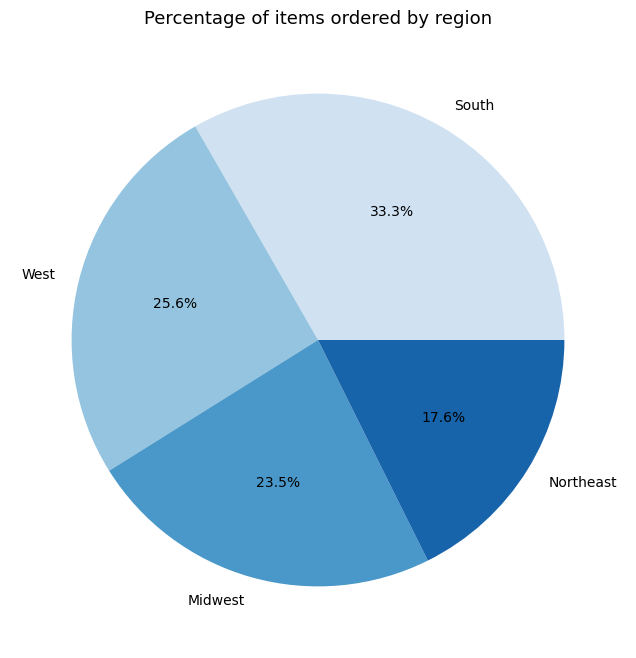

In [91]:
#Pie chart of percentage of items ordered by region
pie_orders_region = df_reg_cust['region'].value_counts().plot.pie(figsize = (8,8), 
                                                                         colors = sns.color_palette('Blues', 4), 
                                                                         autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of items ordered by region',fontsize=13)
plt.show()

In [93]:
pie_orders_region.figure.savefig(os.path.join(viz_path, 'pie_orders_region'))

In [94]:
# Do customers in different regions order at different rates?
#crosstab region and order_frequency flag - normalized
crosstab_regional_freq_n = pd.crosstab(index = df_customer['region'], 
                                         columns = df_customer['order_freq_flag'], 
                                         normalize = 'index')

In [95]:
#second crosstab to put labels on chart
crosstab_regional_freq_2 = pd.crosstab(index = df_customer['region'], 
                                         columns = df_customer['order_freq_flag'])

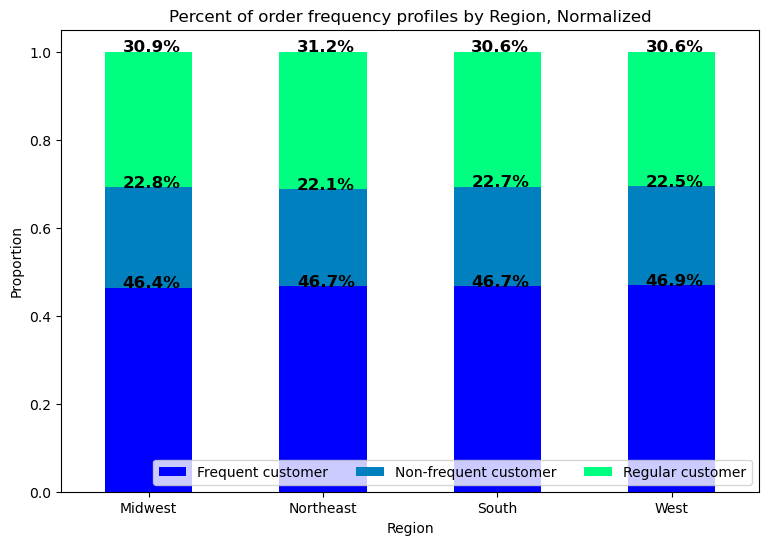

In [97]:
#Regional distribution of frequent customer profiles
bar_norm_region_freq = crosstab_regional_freq_n.plot( kind ='bar',
                                                       stacked = True,
                                                       colormap = 'winter',
                                                       figsize = (9, 6))
 
plt.title('Percent of order frequency profiles by Region, Normalized')
plt.legend(loc = 'lower right', ncol = 3)
plt.xlabel('Region')
plt.xticks(rotation = 0)
plt.ylabel('Proportion')

for n, x in enumerate([*crosstab_regional_freq_2.index.values]):
    for (proportion, y_loc) in zip(crosstab_regional_freq_n.loc[x],
                                   crosstab_regional_freq_n.loc[x].cumsum()):
    
        plt.text(x= n -0.15,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 12,
                 fontweight = 'bold')

plt.show()

In [98]:
bar_norm_region_freq.figure.savefig(os.path.join(viz_path, 'bar_norm_region_freq'))

In [99]:
#Are departments more frequently ordered from in different regions? 
#crosstab region and departments - normalized
crosstab_dept_region_n = pd.crosstab(index = df_profile['department'], 
                                         columns = df_profile['region'], 
                                         normalize = 'index')

In [100]:
#second crosstab to put labels on chart
crosstab_dept_region_2 = pd.crosstab(index = df_profile['department'], columns = df_profile['region'])

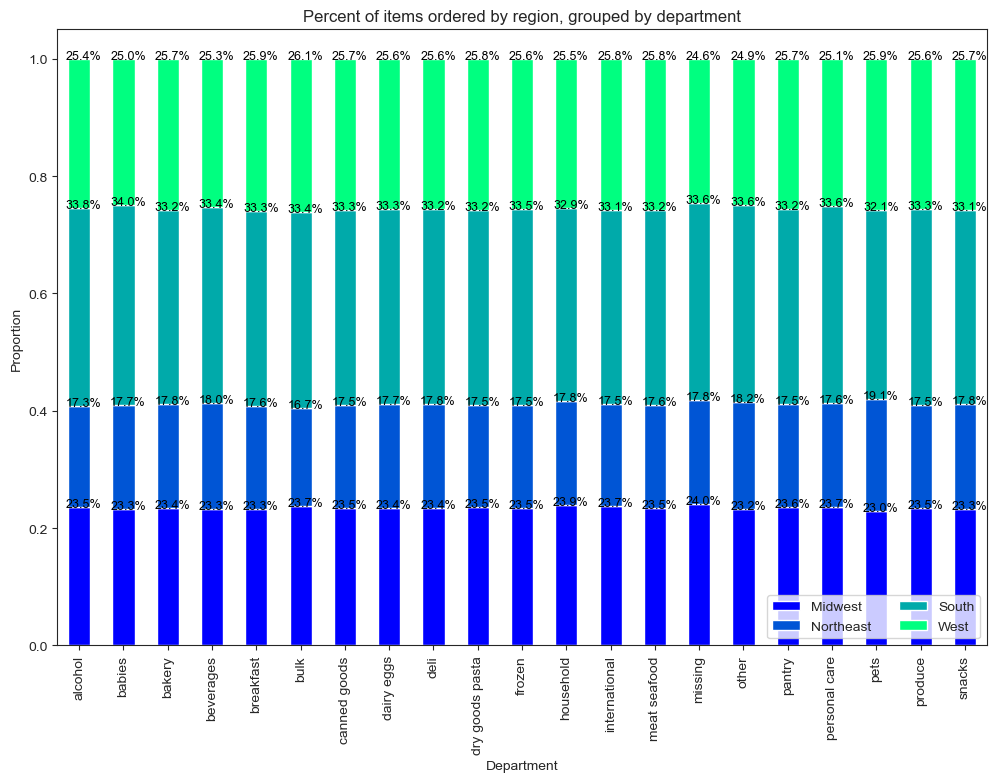

In [160]:
#Normalized bar chart of items ordered by region, grouped by department
bar_norm_dept_region = crosstab_dept_region_n.plot( kind ='bar',
                                                   stacked = True,
                                                   colormap = 'winter',
                                                   figsize = (12, 8)) 
plt.title('Percent of items ordered by region, grouped by department')
plt.legend(loc = 'lower right', ncol = 2)
plt.xlabel('Department')
plt.xticks(rotation = 90)
plt.ylabel('Proportion')

for n, x in enumerate([*crosstab_dept_region_2.index.values]):
    for (proportion, y_loc) in zip(crosstab_dept_region_n.loc[x],
                                   crosstab_dept_region_n.loc[x].cumsum()):    
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 9)
plt.show()

In [161]:
bar_norm_dept_region.figure.savefig(os.path.join(viz_path, 'bar_norm_dept_region'))

#8 Visualizing department preferences of different profile groups

In [103]:
#Top Departments by number of ordered products
df['department'].value_counts(dropna = False)

produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: department, dtype: int64

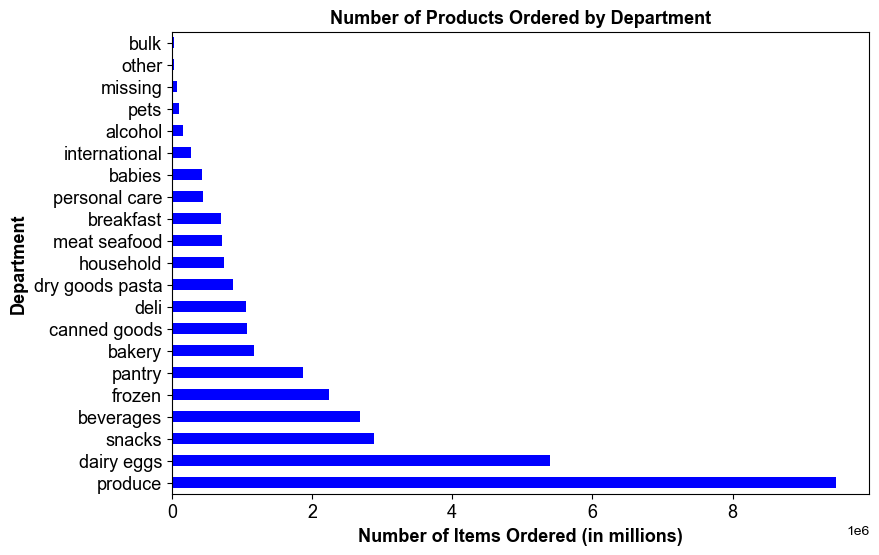

In [104]:
#Bar chart of departments by products ordered
bar_top_depts = df['department'].value_counts().plot.barh(figsize = (9,6), color = ['blue'])
sns.set_style('ticks')
plt.xlabel('Number of Items Ordered (in millions)', fontsize = 13, fontweight = 'bold')
plt.ylabel('Department', fontsize = 13, fontweight = 'bold')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Number of Products Ordered by Department', fontsize = 13, fontweight = 'bold')
plt.show()

In [105]:
bar_top_depts.figure.savefig(os.path.join(viz_path, 'bar_top_depts'))

In [108]:
#average price per item sold by department
cross_dept_avgprice = df_reg_cust.groupby('department').agg({'prices': ['mean']})

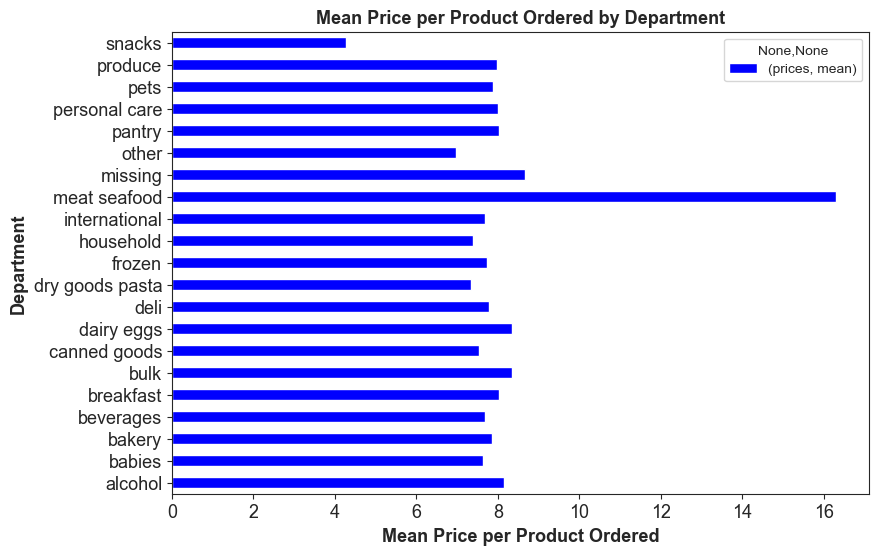

In [109]:
#Bar chart of average price per departments by products ordered
bar_dept_price = cross_dept_avgprice.plot.barh(figsize = (9,6), color = ['blue'])
sns.set_style('ticks')
plt.xlabel('Mean Price per Product Ordered', fontsize = 13, fontweight = 'bold')
plt.ylabel('Department', fontsize = 13, fontweight = 'bold')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Mean Price per Product Ordered by Department', fontsize = 13, fontweight = 'bold')
plt.show()

In [110]:
bar_dept_price.figure.savefig(os.path.join(viz_path, 'bar_dept_price'))

In [111]:
#Age profile
#crosstab department preferences and age groups  - normalized
crosstab_dept_age_n = pd.crosstab(index = df_profile['department'], 
                                         columns = df_profile['age_group'], 
                                         normalize = 'index')

In [112]:
#second crosstab to put labels on chart
crosstab_dept_age_2 = pd.crosstab(index = df_profile['department'], 
                                         columns = df_profile['age_group'])

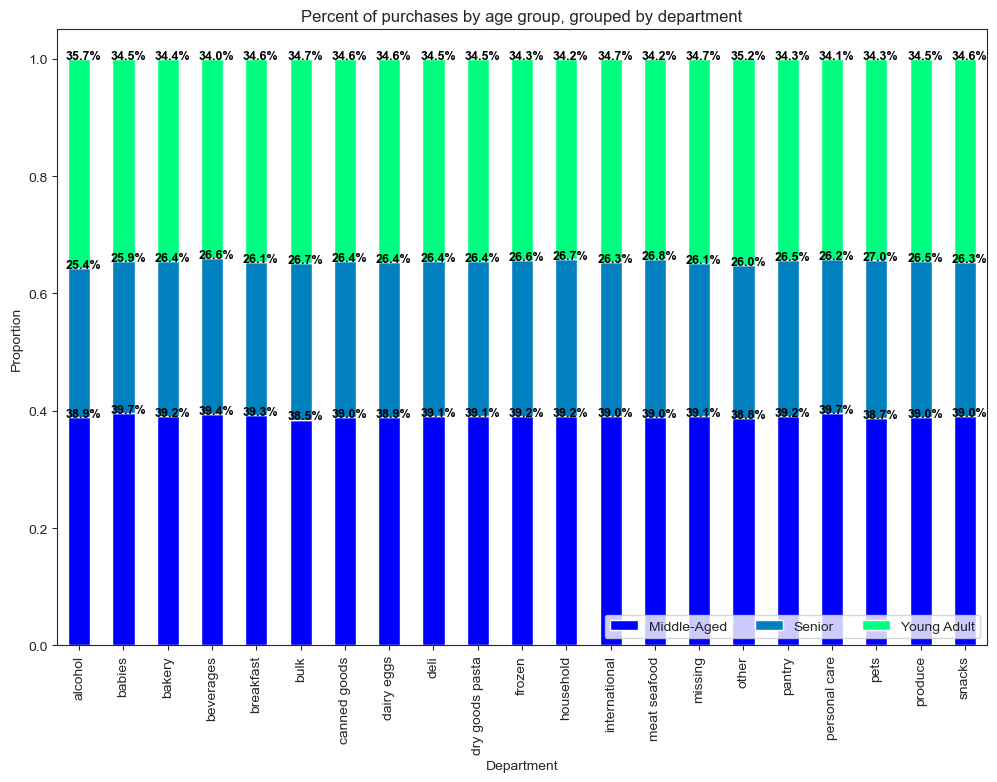

In [113]:
#Normalized bar chart of purchases by age group, grouped by department
bar_norm_dept_age = crosstab_dept_age_n.plot( kind ='bar',
                                                stacked = True,
                                                colormap = 'winter',
                                                figsize = (12, 8))
 
plt.title('Percent of purchases by age group, grouped by department')
plt.legend(loc = 'lower right', ncol = 3)
plt.xlabel('Department')
plt.xticks(rotation = 90)
plt.ylabel('Proportion')

for n, x in enumerate([*crosstab_dept_age_2.index.values]):
    for (proportion, y_loc) in zip(crosstab_dept_age_n.loc[x],
                                   crosstab_dept_age_n.loc[x].cumsum()):
    
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 9,
                 fontweight = 'bold')

plt.show()

In [117]:
bar_norm_dept_age.figure.savefig(os.path.join(viz_path, 'bar_norm_dept_age'))

In [114]:
#Income profile
#crosstab department preferences and income groups  - normalized
crosstab_dept_income_n = pd.crosstab(index = df_profile['department'], 
                                         columns = df_profile['income_group'], 
                                         normalize = 'index')

In [115]:
#second crosstab to put labels on chart
crosstab_dept_income_2 = pd.crosstab(index = df_profile['department'], 
                                         columns = df_profile['income_group'])

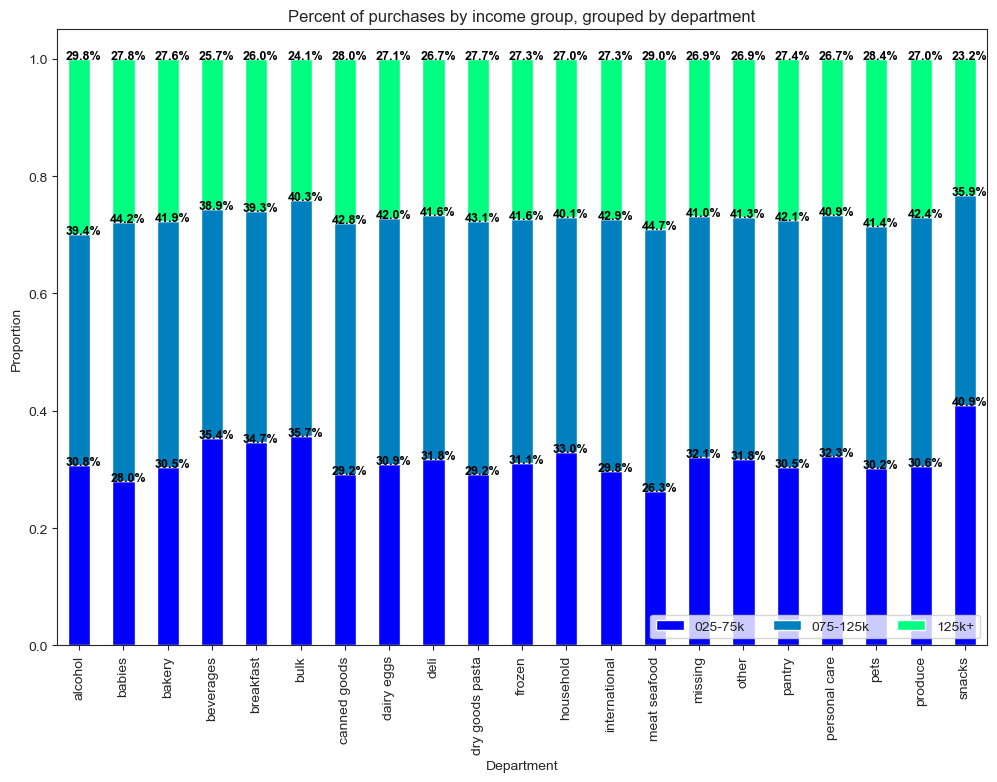

In [116]:
#Normalized bar chart of purchases by income group, grouped by department
bar_norm_dept_income = crosstab_dept_income_n.plot( kind ='bar',
                                                    stacked = True,
                                                    colormap = 'winter',
                                                    figsize = (12, 8))
 
plt.title('Percent of purchases by income group, grouped by department')
plt.legend(loc = 'lower right', ncol = 3)
plt.xlabel('Department')
plt.xticks(rotation = 90)
plt.ylabel('Proportion')

for n, x in enumerate([*crosstab_dept_income_2.index.values]):
    for (proportion, y_loc) in zip(crosstab_dept_income_n.loc[x],
                                   crosstab_dept_income_n.loc[x].cumsum()):
    
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 9,
                 fontweight = 'bold')

plt.show()

In [118]:
bar_norm_dept_income.figure.savefig(os.path.join(viz_path, 'bar_norm_dept_income'))

In [119]:
#Family/dependant profile
#crosstab department preferences and dependant status groups  - normalized
crosstab_dept_parent_n = pd.crosstab(index = df_profile['department'], 
                                         columns = df_profile['dependants'], 
                                         normalize = 'index')

In [120]:
#second crosstab to put labels on chart
crosstab_dept_parent_2 = pd.crosstab(index = df_profile['department'], 
                                         columns = df_profile['dependants'])

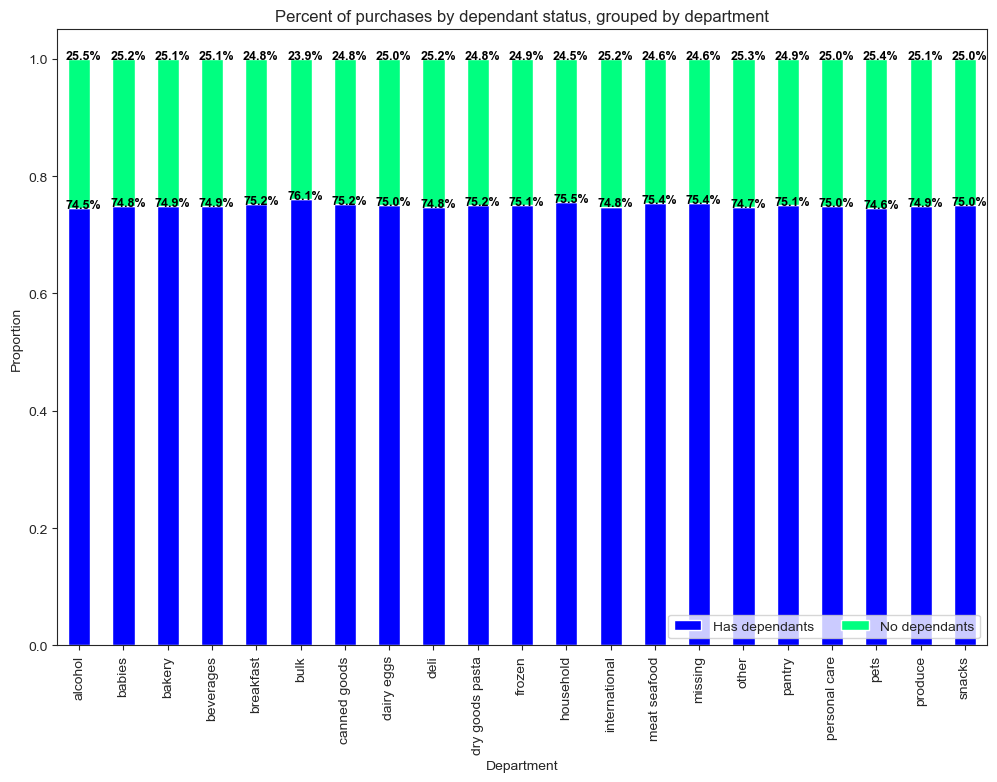

In [121]:
#Normalized bar chart of purchases by income group, grouped by department
bar_norm_dept_parent = crosstab_dept_parent_n.plot( kind ='bar',
                                                    stacked = True,
                                                    colormap = 'winter',
                                                    figsize = (12, 8))
 
plt.title('Percent of purchases by dependant status, grouped by department')
plt.legend(loc = 'lower right', ncol = 2)
plt.xlabel('Department')
plt.xticks(rotation = 90)
plt.ylabel('Proportion')

for n, x in enumerate([*crosstab_dept_parent_2.index.values]):
    for (proportion, y_loc) in zip(crosstab_dept_parent_n.loc[x],
                                   crosstab_dept_parent_n.loc[x].cumsum()):
    
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 9,
                 fontweight = 'bold')

plt.show()

In [122]:
bar_norm_dept_parent.figure.savefig(os.path.join(viz_path, 'bar_norm_dept_parent'))

In [123]:
#Diet profile
#crosstab department preferences and diet styles  - normalized
crosstab_dept_diet_n= pd.crosstab(index = df_profile['department'], 
                                         columns = df_profile['diet_style'], 
                                         normalize = 'index')

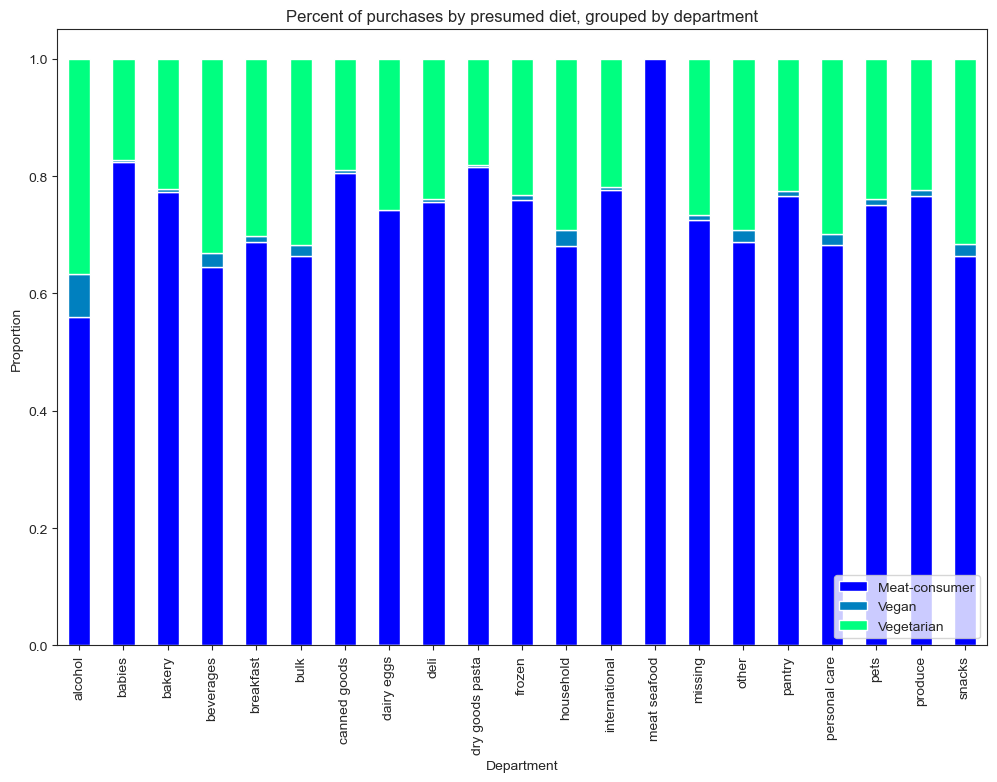

In [125]:
#Normalized bar chart of purchases by diet styles, grouped by department
bar_norm_dept_diet = crosstab_dept_diet_n.plot( kind ='bar',
                                                stacked = True,
                                                colormap = 'winter',
                                                figsize = (12, 8))
 
plt.title('Percent of purchases by presumed diet, grouped by department')
plt.legend(loc = 'lower right', ncol = 1)
plt.xlabel('Department')
plt.xticks(rotation = 90)
plt.ylabel('Proportion')

plt.show()

In [126]:
bar_norm_dept_diet.figure.savefig(os.path.join(viz_path, 'bar_norm_dept_diet'))

In [127]:
#Pet ownership profile
#crosstab department preferences and pet ownership  - normalized
crosstab_dept_pet_n= pd.crosstab(index = df_profile['department'], 
                                         columns = df_profile['has_pet'], 
                                         normalize = 'index')

In [128]:
#second crosstab to put labels on chart
crosstab_dept_pet_2 = pd.crosstab(index = df_profile['department'], 
                                         columns = df_profile['has_pet'])

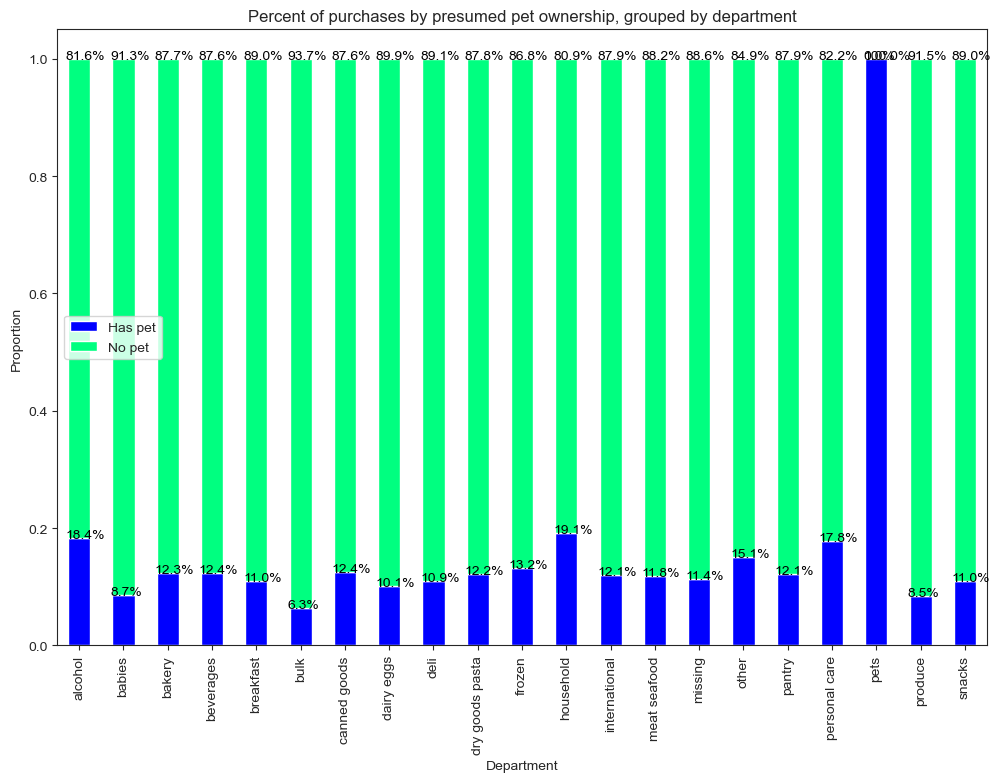

In [129]:
#Normalized bar chart of purchases by pet ownership, grouped by department
bar_norm_dept_pet = crosstab_dept_pet_n.plot( kind ='bar',
                                                stacked = True,
                                                colormap = 'winter',
                                                figsize = (12, 8))
 
plt.title('Percent of purchases by presumed pet ownership, grouped by department')
plt.legend(loc = 'center left', ncol = 1)
plt.xlabel('Department')
plt.xticks(rotation = 90)
plt.ylabel('Proportion')

for n, x in enumerate([*crosstab_dept_pet_2.index.values]):
    for (proportion, y_loc) in zip(crosstab_dept_pet_n.loc[x],
                                   crosstab_dept_pet_n.loc[x].cumsum()):
    
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 10)
            #     fontweight = 'bold')

plt.show()

In [130]:
bar_norm_dept_pet.figure.savefig(os.path.join(viz_path, 'bar_norm_dept_pet'))

In [131]:
#Order frequency profile
#crosstab department and order_frequency flag - normalized
crosstab_dept_freq_n = pd.crosstab(index = df_profile['department'], 
                                         columns = df_profile['order_freq_flag'], 
                                         normalize = 'index')

In [132]:
#second crosstab to put labels on chart
crosstab_dept_freq_2 = pd.crosstab(index = df_profile['department'], 
                                         columns = df_profile['order_freq_flag'])

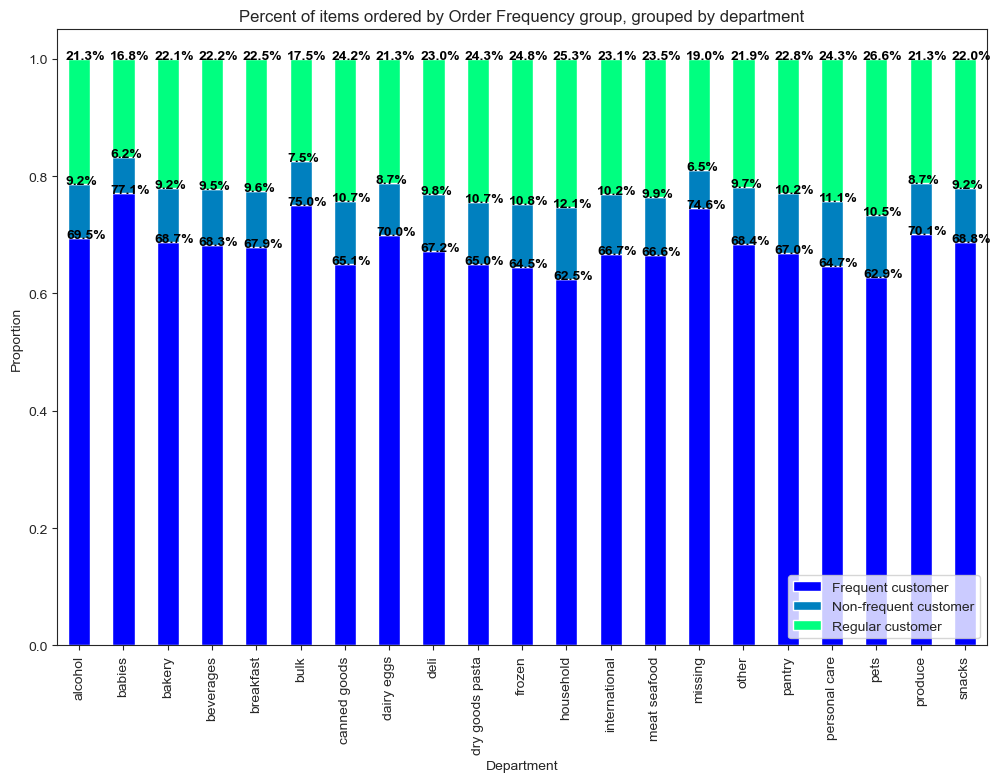

In [133]:
#Normalized bar chart of items ordered by order frquency group, grouped by department
bar_norm_dept_freq = crosstab_dept_freq_n.plot( kind ='bar',
                                                stacked = True,
                                                colormap = 'winter',
                                                figsize = (12, 8))
 
plt.title('Percent of items ordered by Order Frequency group, grouped by department')
plt.legend(loc = 'lower right', ncol = 1)
plt.xlabel('Department')
plt.xticks(rotation = 90)
plt.ylabel('Proportion')

for n, x in enumerate([*crosstab_dept_freq_2.index.values]):
    for (proportion, y_loc) in zip(crosstab_dept_freq_n.loc[x],
                                   crosstab_dept_freq_n.loc[x].cumsum()):
    
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 10,
                 fontweight = 'bold')

plt.show()

In [134]:
bar_norm_dept_freq.figure.savefig(os.path.join(viz_path, 'bar_norm_dept_freq'))

In [135]:
#Loyalty flag profile
#crosstab region and loyal customer flag - normalized
crosstab_dept_loyal_n = pd.crosstab(index = df_profile['department'], 
                                         columns = df_profile['loyalty_flag'], 
                                         normalize = 'index')

In [136]:
#second crosstab to put labels on chart
crosstab_dept_loyal_2 = pd.crosstab(index = df_profile['department'], 
                                         columns = df_profile['loyalty_flag'])

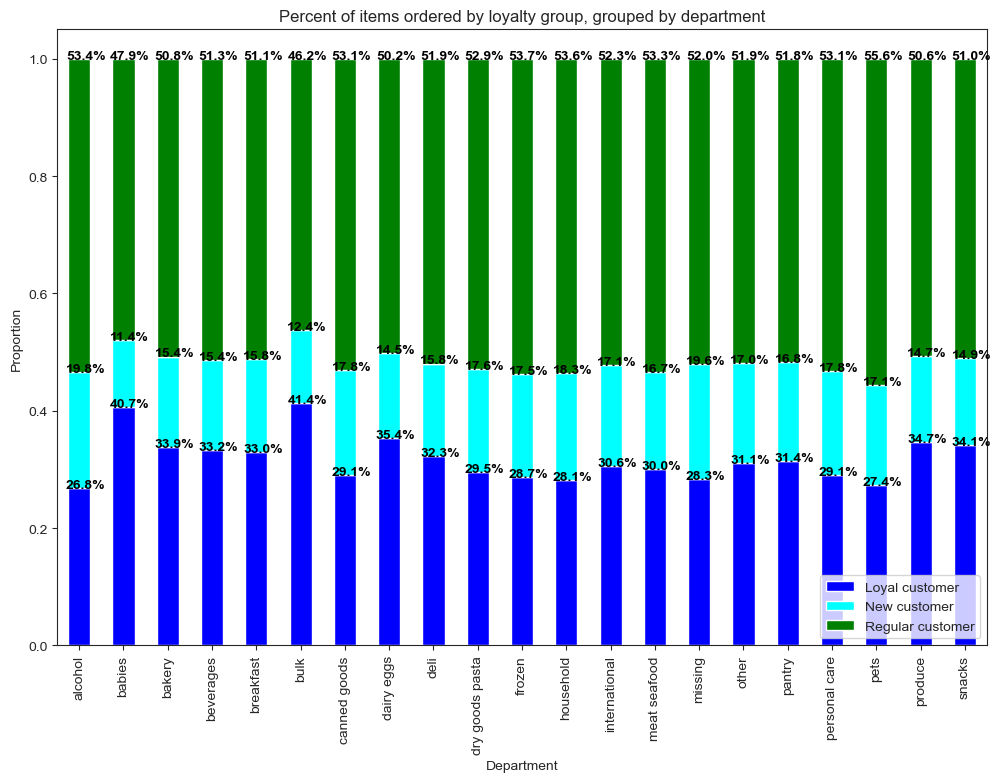

In [174]:
#Normalized bar chart of items ordered by loyalty group, grouped by department
bar_norm_dept_loyalty = crosstab_dept_loyal_n.plot( kind ='bar',
                                                stacked = True,
                                                color = ('Blue', 'Cyan', 'Green'),
                                                figsize = (12, 8))
 
plt.title('Percent of items ordered by loyalty group, grouped by department')
plt.legend(loc = 'lower right', ncol = 1)
plt.xlabel('Department')
plt.xticks(rotation = 90)
plt.ylabel('Proportion')

for n, x in enumerate([*crosstab_dept_loyal_2.index.values]):
    for (proportion, y_loc) in zip(crosstab_dept_loyal_n.loc[x],
                                   crosstab_dept_loyal_n.loc[x].cumsum()):
    
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 10,
                 fontweight = 'bold')

plt.show()

In [175]:
bar_norm_dept_loyalty.figure.savefig(os.path.join(viz_path, 'bar_norm_dept_loyalty'))

#09 Price_range Visualization and Investigative Crosstabs

In [140]:
# create dataframe with only one instance of each product_id
df_product = df_reg_cust.drop_duplicates(subset = ["product_id"])

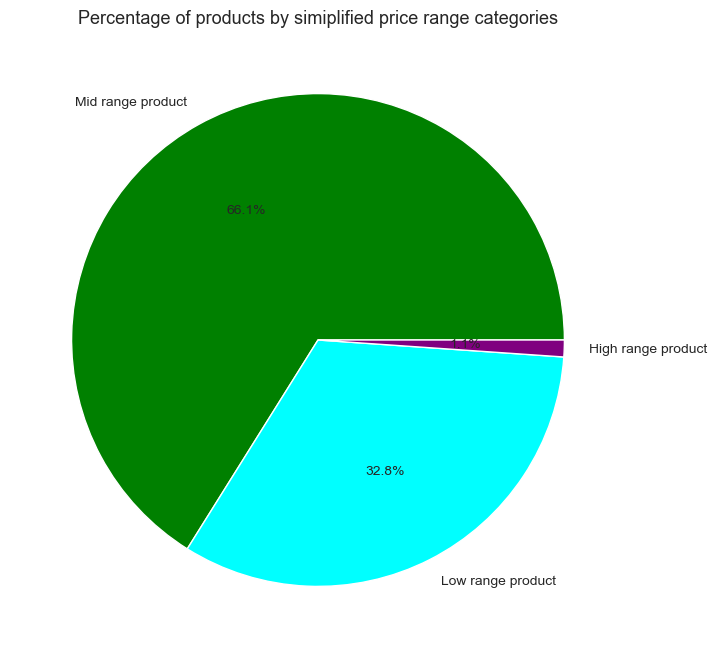

In [167]:
# Simplified Price Range Visualization
pie_price_range = df_product['price_range_loc'].value_counts().plot.pie(figsize = (8,8), 
                                                                       colors = ('Green', 'Cyan', 'Purple'),
                                                                       autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of products by simiplified price range categories',fontsize=13)
plt.show()

In [168]:
pie_price_range.figure.savefig(os.path.join(viz_path, 'pie_price_range1'))

In [142]:
#crosstab departments and price_range_loc with unique product id- normalized
crosstab_dept_price_range1_n = pd.crosstab(index = df_product['department'], 
                                           columns = df_product['price_range_loc'], 
                                           normalize = 'index')

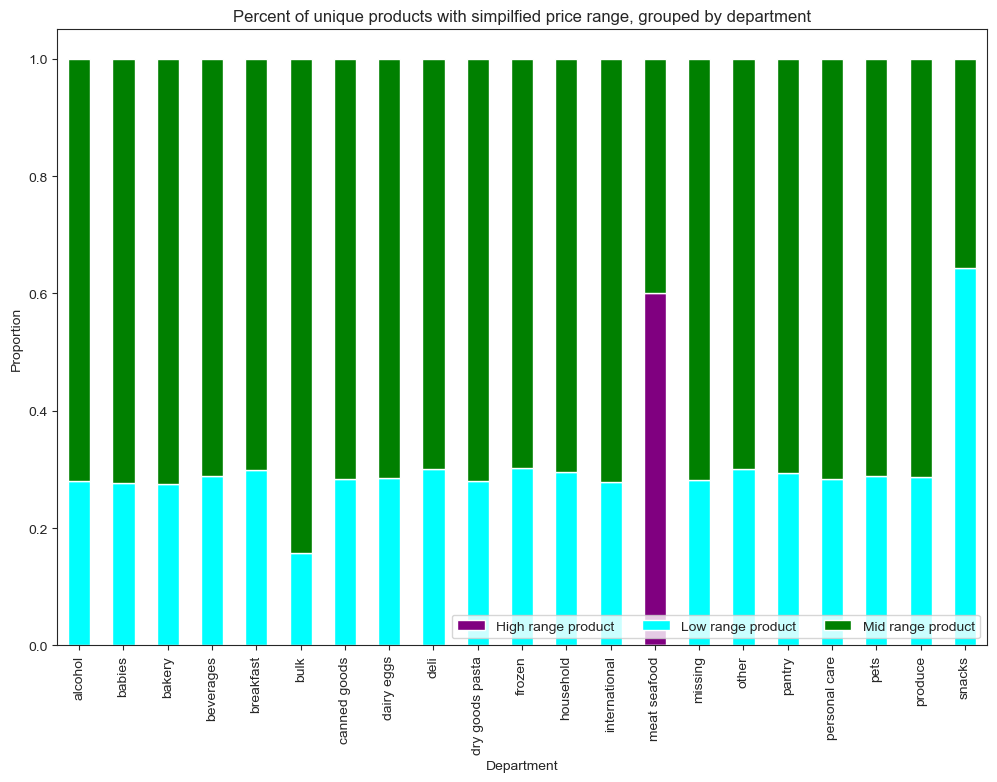

In [171]:
#Normalized bar chart of simplified price ranges, grouped by department, unique product id
bar_norm_dept_price_range1 = crosstab_dept_price_range1_n.plot( kind ='bar',
                                                                stacked = True,
                                                                color = ('Purple', 'Cyan', 'Green'),
                                                                figsize = (12, 8))
 
plt.title('Percent of unique products with simpilfied price range, grouped by department')
plt.legend(loc = 'lower right', ncol = 3)
plt.xlabel('Department')
plt.xticks(rotation = 90)
plt.ylabel('Proportion')
plt.show()

In [172]:
bar_norm_dept_price_range1.figure.savefig(os.path.join(viz_path, 'bar_norm_dept_price_range1'))

In [149]:
# crosstab diet_style with income_group to determine if income may be affecting purchasing patterns
cross_income_diet = pd.crosstab(index = df_customer['diet_style'], 
                                    columns = df_customer['income_group'], 
                                    normalize = 'index')
cross_income_diet

income_group,025-75k,075-125k,125k+
diet_style,,,
Meat-consumer,0.295020,0.428073,0.276907
Vegan,0.612574,0.237197,0.150229
Vegetarian,0.441558,0.338081,0.220361


In [148]:
#comparing pet ownership and income groups
crosstab_dept_pet_3 = pd.crosstab(index = df_customer['income_group'], 
                                         columns = df_customer['has_pet'], 
                                         normalize = 'index')
crosstab_dept_pet_3

has_pet,Has pet,No pet
income_group,,
025-75k,0.068723,0.931277
075-125k,0.084685,0.915315
125k+,0.093054,0.906946


In [151]:
#comparing pet ownership and order frequency groups
crosstab_pet_freq = pd.crosstab(index = df_customer['has_pet'], 
                                        columns = df_customer['order_freq_flag'],
                                        normalize = 'index')
crosstab_pet_freq

order_freq_flag,Frequent customer,Non-frequent customer,Regular customer
has_pet,,,
Has pet,0.525617,0.167059,0.307324
No pet,0.461688,0.230596,0.307716


In [157]:
#The average price per item is highest on day 0 and 6, what departments have the most orders each day? 
#crosstab departments and Orders per day- normalized
crosstab_dept_orders_n = pd.crosstab(index = df_reg_cust['orders_day_of_week'], 
                                    columns = df_reg_cust['department'], 
                                    normalize = 'index')
crosstab_dept_orders_n.to_clipboard()